In [915]:
import pandas as pd
import numpy as np
import re
from datetime import datetime, timedelta

In [916]:
df = pd.read_csv("pg_data.csv", encoding='cp1252')

In [917]:
df.head()

,Unnamed: 0,pg_name,location,source_url,sharing_details,room_amenities,common_amenities,food_facility,available_from,posted_on,gate_closing_time,parking
0,0,PG for Girls in Madhapur,Madhapur,https://www.nobroker.in/property/pg/pg-hostel-...,"Rent for four Occupancy\nâ‚¹ 7,500/M\nSecurity...","Bed, Cupboard, Attached bathroom, Geaser, Tabl...","CCTV, Wifi, Power backup, Washing Machine, RO ...",All Meals,"Aug 1, 2025","Jul 1, 2025",Not Provided,Bike
1,1,PG for Boys in Madhapur,Madhapur,https://www.nobroker.in/property/pg/pg-hostel-...,"Rent for double Occupancy\nâ‚¹ 9,000/M\nSecuri...","Bed with mattress, Cupboard, Fan, Light/Chargi...","Food (Andhra hygiene meals), WiFi, TV, Power b...",All Meals,"Aug 1, 2025","Jun 29, 2025",Not Provided,Bike and Car
2,2,PG for Boys in Madhapur,Madhapur,https://www.nobroker.in/property/pg/pg-hostel-...,"Rent for three Occupancy\nâ‚¹ 8,500/M\nSecurit...","Attached bathroom, Geaser, Bedding","Food (Andhra hygiene meals), WiFi, TV, Power b...",All Meals,"Aug 1, 2025","Jul 3, 2025",Not Provided,Bike
3,3,PG for Girls in Madhapur,Madhapur,https://www.nobroker.in/property/pg/pg-hostel-...,"Rent for four Occupancy\nâ‚¹ 8,000/M\nSecurity...","Bed with mattress, Cupboard, Fan, Light, Attac...","Food, WiFi, TV, Washing Machine, Power Backup,...",All Meals,Immediately,"Jul 1, 2025",Not Provided,Bike
4,4,PG for Anyone in Madhapur,Madhapur,https://www.nobroker.in/property/pg/pg-hostel-...,"Rent for three Occupancy\nâ‚¹ 9,000/M\nSecurit...","Bed with mattress, Fan, Light, Attached Bathro...","Food, WiFi, TV, Power Backup, Washing Machine,...",All Meals,Immediately,"Jul 1, 2025",Not Provided,Bike


In [918]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         333 non-null    int64 
 1   pg_name            333 non-null    object
 2   location           333 non-null    object
 3   source_url         333 non-null    object
 4   sharing_details    333 non-null    object
 5   room_amenities     333 non-null    object
 6   common_amenities   333 non-null    object
 7   food_facility      333 non-null    object
 8   available_from     333 non-null    object
 9   posted_on          333 non-null    object
 10  gate_closing_time  333 non-null    object
 11  parking            321 non-null    object
dtypes: int64(1), object(11)
memory usage: 31.3+ KB


In [919]:
df.columns

Index(['Unnamed: 0', 'pg_name', 'location', 'source_url', 'sharing_details',
       'room_amenities', 'common_amenities', 'food_facility', 'available_from',
       'posted_on', 'gate_closing_time', 'parking'],
      dtype='object')

In [920]:
# Step 1: Remove the Unnamed: 0 Column

In [921]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [922]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   pg_name            333 non-null    object
 1   location           333 non-null    object
 2   source_url         333 non-null    object
 3   sharing_details    333 non-null    object
 4   room_amenities     333 non-null    object
 5   common_amenities   333 non-null    object
 6   food_facility      333 non-null    object
 7   available_from     333 non-null    object
 8   posted_on          333 non-null    object
 9   gate_closing_time  333 non-null    object
 10  parking            321 non-null    object
dtypes: object(11)
memory usage: 28.7+ KB


In [923]:
# Step 2: Extract share type, Rent and Occupancy Type

In [924]:
occupancy_list = df['sharing_details'].apply(
                    lambda text: re.findall(r'Rent for (\w+) Occupancy', text)[0] if re.findall(r'Rent for (\w+) Occupancy', text) else None
                    ).tolist()
df['occupancy'] = occupancy_list
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   pg_name            333 non-null    object
 1   location           333 non-null    object
 2   source_url         333 non-null    object
 3   sharing_details    333 non-null    object
 4   room_amenities     333 non-null    object
 5   common_amenities   333 non-null    object
 6   food_facility      333 non-null    object
 7   available_from     333 non-null    object
 8   posted_on          333 non-null    object
 9   gate_closing_time  333 non-null    object
 10  parking            321 non-null    object
 11  occupancy          333 non-null    object
dtypes: object(12)
memory usage: 31.3+ KB


In [925]:
rent_list = df['sharing_details'].apply(
                lambda text: re.findall(r'(\d{1,3}(?:,\d{3})*)/M', text)
            ).apply(
                lambda lst: int(lst[0].replace(',', '')) if lst else None
            ).tolist()
df['rent'] = rent_list
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   pg_name            333 non-null    object
 1   location           333 non-null    object
 2   source_url         333 non-null    object
 3   sharing_details    333 non-null    object
 4   room_amenities     333 non-null    object
 5   common_amenities   333 non-null    object
 6   food_facility      333 non-null    object
 7   available_from     333 non-null    object
 8   posted_on          333 non-null    object
 9   gate_closing_time  333 non-null    object
 10  parking            321 non-null    object
 11  occupancy          333 non-null    object
 12  rent               333 non-null    int64 
dtypes: int64(1), object(12)
memory usage: 33.9+ KB


In [926]:
# Look at first few values
df['sharing_details'].head(5).tolist()


['Rent for four Occupancy\nâ‚¹ 7,500/M\nSecurity Deposit\nâ‚¹ 2,000',
 'Rent for double Occupancy\nâ‚¹ 9,000/M\nSecurity Deposit\nâ‚¹ 9,000',
 'Rent for three Occupancy\nâ‚¹ 8,500/M\nSecurity Deposit\nâ‚¹ 2,000',
 'Rent for four Occupancy\nâ‚¹ 8,000/M\nSecurity Deposit\nâ‚¹ 8,000',
 'Rent for three Occupancy\nâ‚¹ 9,000/M\nSecurity Deposit\nâ‚¹ 3,000']

In [927]:
deposit_list = df['sharing_details'].apply(
                    lambda text: re.findall(r'Security Deposit[\s\S]*?(\d{1,3}(?:,\d{3})*)', text)
                ).apply(
                    lambda lst: int(lst[0].replace(',', '')) if lst else None
                ).tolist()

df['deposit'] = deposit_list
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   pg_name            333 non-null    object
 1   location           333 non-null    object
 2   source_url         333 non-null    object
 3   sharing_details    333 non-null    object
 4   room_amenities     333 non-null    object
 5   common_amenities   333 non-null    object
 6   food_facility      333 non-null    object
 7   available_from     333 non-null    object
 8   posted_on          333 non-null    object
 9   gate_closing_time  333 non-null    object
 10  parking            321 non-null    object
 11  occupancy          333 non-null    object
 12  rent               333 non-null    int64 
 13  deposit            333 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 36.6+ KB


In [928]:
df[['sharing_details', 'occupancy', 'rent', 'deposit']].head()

,sharing_details,occupancy,rent,deposit
0,"Rent for four Occupancy\nâ‚¹ 7,500/M\nSecurity...",four,7500,2000
1,"Rent for double Occupancy\nâ‚¹ 9,000/M\nSecuri...",double,9000,9000
2,"Rent for three Occupancy\nâ‚¹ 8,500/M\nSecurit...",three,8500,2000
3,"Rent for four Occupancy\nâ‚¹ 8,000/M\nSecurity...",four,8000,8000
4,"Rent for three Occupancy\nâ‚¹ 9,000/M\nSecurit...",three,9000,3000


In [929]:
df['available_from'].unique()

array(['Aug 1, 2025', 'Immediately', 'Available From: Immediately',
       'Aug 5, 2025', 'Sep 1, 2025', 'Available From: Sep 1, 2025',
       'Jul 30, 2025'], dtype=object)

In [930]:
# #step3: Convert to datetime
# df['available_from'] = df['available_from'].str.replace('Available From: ', '', regex=False)
# df['available_from'] = df['available_from'].replace('Immediately', (datetime.today() - timedelta(days=13)).date())
# df['available_from'] = pd.to_datetime(df['available_from'], errors='coerce')


In [931]:
#step3: Convert to datetime
df['available_from'] = df['available_from'].str.replace('Available From: ', '', regex=False)
df['available_from'] = df['available_from'].replace('Immediately', datetime.today().date())
df['available_from'] = pd.to_datetime(df['available_from'], errors='coerce')

df['available_from'].unique()

<DatetimeArray>
['2025-08-01 00:00:00', '2025-07-23 00:00:00', '2025-08-05 00:00:00',
 '2025-09-01 00:00:00', '2025-07-30 00:00:00']
Length: 5, dtype: datetime64[ns]

In [932]:
df['available_from']

0     2025-08-01
1     2025-08-01
2     2025-08-01
3     2025-07-23
4     2025-07-23
         ...    
328   2025-07-23
329   2025-07-23
330   2025-07-23
331   2025-07-23
332   2025-07-23
Name: available_from, Length: 333, dtype: datetime64[ns]

In [933]:
df['posted_on'].unique()

array(['Jul 1, 2025', 'Jun 29, 2025', 'Jul 3, 2025', 'Jun 30, 2025',
       'Jun 1, 2025', 'Mar 23, 2025', 'Jul 4, 2025',
       'Posted On: Jul 3, 2025', 'Jun 28, 2025', 'Jul 5, 2025',
       'Jul 2, 2025', 'Jun 4, 2025', 'Apr 12, 2025', 'Jun 26, 2025',
       'Jun 19, 2025', 'Jun 17, 2025', 'Jun 23, 2025', 'Jun 27, 2025',
       'Jun 22, 2025', 'Jun 13, 2025', 'Jun 10, 2025', 'Oct 31, 2024',
       'Jun 11, 2025', 'Jun 12, 2025', 'Jun 18, 2025', 'May 25, 2025',
       'May 29, 2025', 'Jun 14, 2025', 'Jun 8, 2025', 'Jul 7, 2025',
       'May 30, 2025', 'Jun 16, 2025', 'Jun 25, 2025', 'Jul 8, 2025',
       'Jun 2, 2025', 'May 28, 2025', 'Jun 6, 2025', 'Jun 7, 2025',
       'Jun 9, 2025', 'May 31, 2025', 'May 26, 2025', 'Oct 17, 2023',
       'Jun 15, 2025', 'May 8, 2024', 'Jun 24, 2025', 'Jul 6, 2025',
       'Jun 3, 2025', 'May 11, 2024'], dtype=object)

In [934]:
#step4: Clean and Convert posted_on to Date (No Time)

In [935]:
df['posted_on'] = df['posted_on'].str.replace('Posted On: ', '', regex=False)
df['posted_on'] = pd.to_datetime(df['posted_on'], errors='coerce')
df['posted_on'] = df['posted_on'].dt.date

df['posted_on'].unique()

array([datetime.date(2025, 7, 1), datetime.date(2025, 6, 29),
       datetime.date(2025, 7, 3), datetime.date(2025, 6, 30),
       datetime.date(2025, 6, 1), datetime.date(2025, 3, 23),
       datetime.date(2025, 7, 4), datetime.date(2025, 6, 28),
       datetime.date(2025, 7, 5), datetime.date(2025, 7, 2),
       datetime.date(2025, 6, 4), datetime.date(2025, 4, 12),
       datetime.date(2025, 6, 26), datetime.date(2025, 6, 19),
       datetime.date(2025, 6, 17), datetime.date(2025, 6, 23),
       datetime.date(2025, 6, 27), datetime.date(2025, 6, 22),
       datetime.date(2025, 6, 13), datetime.date(2025, 6, 10),
       datetime.date(2024, 10, 31), datetime.date(2025, 6, 11),
       datetime.date(2025, 6, 12), datetime.date(2025, 6, 18),
       datetime.date(2025, 5, 25), datetime.date(2025, 5, 29),
       datetime.date(2025, 6, 14), datetime.date(2025, 6, 8),
       datetime.date(2025, 7, 7), datetime.date(2025, 5, 30),
       datetime.date(2025, 6, 16), datetime.date(2025, 6, 25),


In [936]:
df['posted_on'].head()

0    2025-07-01
1    2025-06-29
2    2025-07-03
3    2025-07-01
4    2025-07-01
Name: posted_on, dtype: object

In [937]:
df.head()

,pg_name,location,source_url,sharing_details,room_amenities,common_amenities,food_facility,available_from,posted_on,gate_closing_time,parking,occupancy,rent,deposit
0,PG for Girls in Madhapur,Madhapur,https://www.nobroker.in/property/pg/pg-hostel-...,"Rent for four Occupancy\nâ‚¹ 7,500/M\nSecurity...","Bed, Cupboard, Attached bathroom, Geaser, Tabl...","CCTV, Wifi, Power backup, Washing Machine, RO ...",All Meals,2025-08-01,2025-07-01,Not Provided,Bike,four,7500,2000
1,PG for Boys in Madhapur,Madhapur,https://www.nobroker.in/property/pg/pg-hostel-...,"Rent for double Occupancy\nâ‚¹ 9,000/M\nSecuri...","Bed with mattress, Cupboard, Fan, Light/Chargi...","Food (Andhra hygiene meals), WiFi, TV, Power b...",All Meals,2025-08-01,2025-06-29,Not Provided,Bike and Car,double,9000,9000
2,PG for Boys in Madhapur,Madhapur,https://www.nobroker.in/property/pg/pg-hostel-...,"Rent for three Occupancy\nâ‚¹ 8,500/M\nSecurit...","Attached bathroom, Geaser, Bedding","Food (Andhra hygiene meals), WiFi, TV, Power b...",All Meals,2025-08-01,2025-07-03,Not Provided,Bike,three,8500,2000
3,PG for Girls in Madhapur,Madhapur,https://www.nobroker.in/property/pg/pg-hostel-...,"Rent for four Occupancy\nâ‚¹ 8,000/M\nSecurity...","Bed with mattress, Cupboard, Fan, Light, Attac...","Food, WiFi, TV, Washing Machine, Power Backup,...",All Meals,2025-07-23,2025-07-01,Not Provided,Bike,four,8000,8000
4,PG for Anyone in Madhapur,Madhapur,https://www.nobroker.in/property/pg/pg-hostel-...,"Rent for three Occupancy\nâ‚¹ 9,000/M\nSecurit...","Bed with mattress, Fan, Light, Attached Bathro...","Food, WiFi, TV, Power Backup, Washing Machine,...",All Meals,2025-07-23,2025-07-01,Not Provided,Bike,three,9000,3000


In [938]:
# step5: Remove source_url Column

In [939]:
df.drop(columns=['source_url'], inplace=True)

In [940]:
# step6: 2. Remove gate_closing_time

In [941]:
df['gate_closing_time'].value_counts()

gate_closing_time
Not Provided                       311
11:00 PM                             7
10:30 PM                             5
12:00 AM                             4
Gate Closing Time: Not Provided      2
12:55 AM                             2
11:30 PM                             1
10:00 PM                             1
Name: count, dtype: int64

In [942]:
df.drop(columns=['gate_closing_time'], inplace=True)

In [943]:
# step7:  Missing Values in parking (2 missing)

In [944]:
mode_parking = df['parking'].mode()[0]
df['parking'].fillna(mode_parking, inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21460\190862555.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['parking'].fillna(mode_parking, inplace=True)


In [945]:
# step8: drop sharing_details column
df.drop(columns=['sharing_details'], inplace=True)

In [946]:
# step9: Clean the parking Column
df['parking'] = df['parking'].replace({
    'Parking: Bike and Car': 'Bike and Car',
    'Parking: Bike': 'Bike'
})
df['parking'].unique()

array(['Bike', 'Bike and Car', 'Car'], dtype=object)

In [947]:
df['food_facility'].unique()

array(['All Meals', 'Not Available', 'Food Facility: All Meals',
       'Breakfast,dinner'], dtype=object)

In [948]:
#step10: 
df['food_facility'] = df['food_facility'].replace("Food Facility: All Meals", "All Meals")

In [949]:
df['food_facility'].unique()

array(['All Meals', 'Not Available', 'Breakfast,dinner'], dtype=object)

In [950]:
amenity_synonyms = {
    "air conditioner": "ac",
    "air conditioner (ac)": "ac",
    "air conditioning (ac)": "ac",
    "ac (on request)": "ac (on request)",

    "ceiling fan": "fan",
    
    "wi-fi": "wifi",
    "wi?fi": "wifi",

    "telivision": "tv",
    
    "refrigerator": "fridge",
    
    "geaser": "geyser",
    "geyser (hot water)": "geyser",
    "geyser (seasonal)": "geyser (seasonal)",


    "wardrobe": "cupboard",
    "cupboard/wardrobe": "cupboard",
    "wardrobe/cupboard": "cupboard",
    "wardrobe/ cupboard": "cupboard",
    "shared cupboard/wardrobe": "shared cupboard",
    "shared wardrobe/cupboard": "shared cupboard",
    "cupboard with lockers": "cupboard",
    "basic cupboard": "cupboard",
    "basic storage (likely)": "cupboard",
    
    "light/charging point": "charging points",

    "study table & chairs": "study table & chair",
    "study table & chair)": "study table & chair",
    'basic study table & chairs': "study table & chair",
    "table": "study table",
    
    "attached washroom": "attached bathroom",
    "shared washroom": "attached bathroom",
    "bathroom": "attached bathroom",
    "attached bathroom with geyser": ["attached bathroom", "geyser"],
    "attached bathroom with geyser (hot water)": ["attached bathroom", "geyser"],
    "attached bathroom (western)": "attached bathroom",
    
    "bedding": "mattress",
    "bed sheet": "bed sheets",
    "cots": "bed",
    
    # split these based on bed presence (logic handled separately)
    "bedding with mattress": ["bed", "mattress"],
    "bed with mattress": ["bed", "mattress"],
    "fully furnished room (bed & mattress": ["bed", "mattress"],
    "fully furnished room (bed with mattress": ["bed", "mattress"],
    "fully furnished room (2 beds with mattresses)": ["bed", "mattress"],
    "double occupancy room – 2 beds with mattresses": ["bed", "mattress"],
    "3 beds with mattresses": ["bed", "mattress"],
    "4 beds with mattresses": ["bed", "mattress"]
}

# -----------------------------
# 2. Classification sets
# -----------------------------
room_only = {"ac", "cupboard", "bedding", "attached bathroom", "geyser"}
common_only = {"tv", "wifi", "microwave", "fridge", "washing machine", "water purifier", "safety lockers"}
basic_room_amenities = {"bed", "fan", "light", "charging points"}
basic_common_amenities = {"wifi", "fridge", "washing machine", "water purifier", "cctv", "housekeeping"}

# -----------------------------
# 3. Regex for removal from common
# -----------------------------
remove_pattern = re.compile(r"(food|meal|parking|inferred|likely|na|none)", re.IGNORECASE)

# -----------------------------
# 4. Clean room/common amenities separately
# -----------------------------
def clean_amenities(raw_text, is_common=False):
    if pd.isna(raw_text):
        return []
    items = re.split(r",|\n|;", raw_text.lower())
    cleaned = []
    has_bed = False

    # First pass to detect bed presence
    for item in items:
        item = item.strip()
        if item == "bed":
            has_bed = True

    # Second pass to apply logic
    for item in items:
        item = item.strip()
        if not item:
            continue
        # Remove unwanted common items
        if is_common and remove_pattern.search(item):
            continue
        mapped = amenity_synonyms.get(item)
        if mapped:
            if isinstance(mapped, list):
                if has_bed:
                    cleaned.append("mattress")
                else:
                    cleaned.extend(["bed", "mattress"])
            else:
                cleaned.append(mapped)
        else:
            cleaned.append(item)
    return list(set(cleaned))

# -----------------------------
# 5. Apply cleaning
# -----------------------------
df['room_amenities'] = df['room_amenities'].apply(lambda x: clean_amenities(x, is_common=False))
df['common_amenities'] = df['common_amenities'].apply(lambda x: clean_amenities(x, is_common=True))

# -----------------------------
# 6. Fix misplaced + TV logic + renaming
# -----------------------------
def fix_misplaced(row):
    room_set = set(row['room_amenities'])
    common_set = set(row['common_amenities'])

    # Fix misplaced items
    corrected_common = (common_set - room_only) | (common_only & room_set)
    corrected_room = (room_set - common_only) | (room_only & common_set)

    # Add basic
    corrected_room |= basic_room_amenities
    corrected_common |= basic_common_amenities

    # TV logic
    if "tv" in corrected_room and "tv" not in room_set:
        corrected_room.remove("tv")
        corrected_common.add("tv")

    # Rename for clarity
    final_room = []
    for item in corrected_room:
        if item == "bed":
            final_room.append("bed (cot/frame)")
        elif item == "mattress":
            final_room.append("mattress (foam/cotton)")
        else:
            final_room.append(item)

    return sorted(set(final_room)), sorted(set(corrected_common))

# -----------------------------
# 7. Apply fixer
# -----------------------------
df[['room_amenities', 'common_amenities']] = df.apply(
    fix_misplaced, axis=1, result_type='expand'
)


In [951]:
df

,pg_name,location,room_amenities,common_amenities,food_facility,available_from,posted_on,parking,occupancy,rent,deposit
0,PG for Girls in Madhapur,Madhapur,"[attached bathroom, bed (cot/frame), chair, ch...","[24/7 water supply, cctv, common tv, dining ar...",All Meals,2025-08-01,2025-07-01,Bike,four,7500,2000
1,PG for Boys in Madhapur,Madhapur,"[attached bathroom, bed (cot/frame), charging ...","[cctv, fridge, housekeeping, power backup, tv,...",All Meals,2025-08-01,2025-06-29,Bike and Car,double,9000,9000
2,PG for Boys in Madhapur,Madhapur,"[attached bathroom, bed (cot/frame), charging ...","[cctv, fridge, housekeeping, power backup, tv,...",All Meals,2025-08-01,2025-07-03,Bike,three,8500,2000
3,PG for Girls in Madhapur,Madhapur,"[attached bathroom, bed (cot/frame), charging ...","[cctv, fridge, housekeeping, power backup, tv,...",All Meals,2025-07-23,2025-07-01,Bike,four,8000,8000
4,PG for Anyone in Madhapur,Madhapur,"[attached bathroom, bed (cot/frame), charging ...","[cctv, fridge, housekeeping, power backup, tv,...",All Meals,2025-07-23,2025-07-01,Bike,three,9000,3000
...,...,...,...,...,...,...,...,...,...,...,...
328,PG for Boys in Banjara Hills,Banjara Hills,"[ac, bed (cot/frame), charging points, cupboar...","[24×7 security with cctv, cctv, common tv loun...",All Meals,2025-07-23,2025-07-06,Bike,double,8500,1000
329,PG for Boys in Banjara Hills,Banjara Hills,"[ac, bed (cot/frame), charging points, curtain...","[24×7 security with cctv, cctv, common tv loun...",All Meals,2025-07-23,2025-07-06,Bike,three,7500,1000
330,PG for Boys in Banjara Hills,Banjara Hills,"[bed (cot/frame), charging points, curtains, f...","[24×7 security with cctv, cctv, common tv loun...",All Meals,2025-07-23,2025-07-06,Bike,four,6500,1000
331,PG for Anyone in Banjara Hills,Banjara Hills,"[ac, bed (cot/frame), charging points, curtain...","[24×7 security with cctv & gated entry, cctv, ...",Not Available,2025-07-23,2025-06-10,Bike,double,13000,20000


In [974]:
df.to_csv("final_pg_data.csv", index=False)

In [953]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   pg_name           333 non-null    object        
 1   location          333 non-null    object        
 2   room_amenities    333 non-null    object        
 3   common_amenities  333 non-null    object        
 4   food_facility     333 non-null    object        
 5   available_from    333 non-null    datetime64[ns]
 6   posted_on         333 non-null    object        
 7   parking           333 non-null    object        
 8   occupancy         333 non-null    object        
 9   rent              333 non-null    int64         
 10  deposit           333 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 28.7+ KB


## Insights

In [954]:
import seaborn as sns
import matplotlib.pyplot as plt

In [955]:
# 1: Most Common Occupancy Type

In [956]:
df['occupancy'].value_counts()

occupancy
four      140
three      98
double     75
single     20
Name: count, dtype: int64

The most common occupancy type among PGs in Hyderabad is four-sharing, with 140 listings. This is followed by three-sharing (98), double-sharing (75), and single rooms being the least common with just 20 listings. This suggests a strong focus on affordability and space-sharing, which is typical for student and early-career professional accommodations.

In [957]:
# 2: Average Rent and Deposit

In [958]:
print("Average Rent:", df['rent'].mean())
print("Average Deposit:", df['deposit'].mean())

Average Rent: 7985.585585585585
Average Deposit: 3377.126126126126


The average monthly rent for PGs in Hyderabad is approximately ₹7,986, while the average security deposit is around ₹3,377. This suggests that most PG accommodations are relatively affordable and require a modest upfront payment, making them accessible to students and young professionals.

In [959]:
# 3: Rent by Occupancy Type

In [960]:
df.groupby('occupancy')['rent'].mean().sort_values(ascending=False)

occupancy
single    15290.000000
double     9806.666667
three      7532.653061
four       6283.571429
Name: rent, dtype: float64

As expected, single occupancy PGs are the most expensive, with an average rent of around ₹15,290 per month. This is followed by:

Double-sharing: ₹9,807

Three-sharing: ₹7,533

Four-sharing: ₹6,284

The data clearly shows that rent decreases as the number of roommates increases, reflecting the cost-saving benefit of shared living.

In [961]:
# 4: Top 5 Locations by Number of PGs

In [962]:
df['location'].value_counts().head(5)

location
Madhapur      58
Ameerpet      54
Gachibowli    52
Uppal         44
Kondapur      35
Name: count, dtype: int64

The most popular areas for PG accommodations in Hyderabad are:

Madhapur – 58 listings

Ameerpet – 54 listings

Gachibowli – 52 listings

Uppal – 44 listings

Kondapur – 35 listings

These locations are likely hubs for IT parks, coaching centers, or educational institutions, making them prime choices for students and working professionals.

In [963]:
# 5: Rent Distribution 

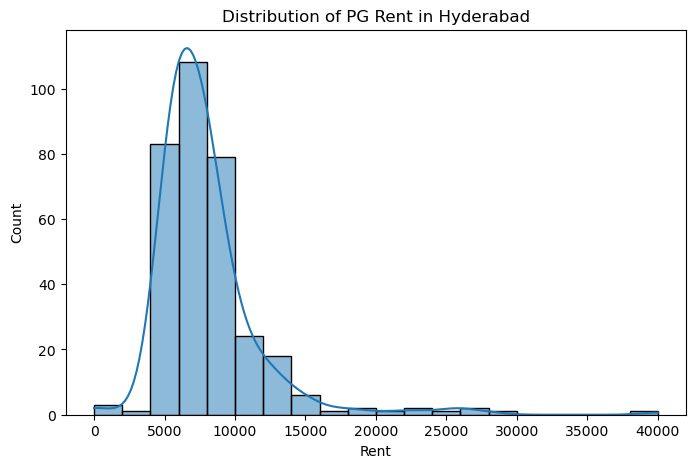

In [964]:
plt.figure(figsize=(8, 5))
sns.histplot(df['rent'], bins=20, kde=True)
plt.title('Distribution of PG Rent in Hyderabad')
plt.xlabel('Rent')
plt.ylabel('Count')
plt.show()

The rent distribution for PGs in Hyderabad is right-skewed, meaning:

Most PGs are priced between ₹5,000 to ₹10,000 per month.

A few outliers are priced much higher, even reaching ₹40,000, but they are rare.

The peak (mode) of the distribution is around ₹7,000–₹8,000, indicating that’s where most PG options lie. This reflects an affordable range for students and entry-level professionals.

In [965]:
# 6: Food Facility Availability

In [966]:
df['food_facility'].value_counts()

food_facility
All Meals           306
Not Available        26
Breakfast,dinner      1
Name: count, dtype: int64

Majority of PGs (91%) provide all meals (304 out of 333 listings).

Only ~8% of PGs do not offer food.

A very small number offer limited meals like just breakfast and dinner.

This indicates that most PGs in Hyderabad are food-inclusive, making them more attractive for students and working professionals who prefer convenience.

In [967]:
# 7: Parking Availability

In [968]:
df['parking'].value_counts()

parking
Bike            301
Bike and Car     29
Car               3
Name: count, dtype: int64

Out of 333 PGs, over 90% (301 PGs) offer bike-only parking. Only 29 PGs provide both bike and car parking, and just 3 PGs support car-only parking.

This trend highlights that most PGs cater to residents using two-wheelers, which aligns well with the student and early-career professional demographic common in Hyderabad.

In [969]:
# 8: Upcoming PGs (Available Within 14 Days)

In [970]:
today = pd.to_datetime('today').normalize()
cutoff = today + timedelta(days=14)

upcoming_pgs = df[df['available_from'] <= cutoff]
print(f"PGs becoming available in next 14 days: {len(upcoming_pgs)}")

PGs becoming available in next 14 days: 331


Out of 333 PG listings, 330 PGs are becoming available within the next 14 days.

This indicates that the Hyderabad PG rental market is highly active, with most listings ready for immediate or near-immediate occupancy — a favorable scenario for students and professionals searching for quick move-in options.

In [971]:
# 9: Most Common Room Amenities

In [972]:
from collections import Counter
room_counts = Counter([item for sublist in df['room_amenities'] for item in sublist])
print(room_counts.most_common(10)) 

[('bed (cot/frame)', 333), ('charging points', 333), ('fan', 333), ('light', 333), ('cupboard', 327), ('mattress (foam/cotton)', 320), ('attached bathroom', 315), ('geyser', 186), ('ac', 134), ('chair', 45)]


In [973]:
from collections import Counter
room_counts = Counter([item for sublist in df['room_amenities'] for item in sublist])
print(room_counts) 

Counter({'bed (cot/frame)': 333, 'charging points': 333, 'fan': 333, 'light': 333, 'cupboard': 327, 'mattress (foam/cotton)': 320, 'attached bathroom': 315, 'geyser': 186, 'ac': 134, 'chair': 45, 'television': 26, 'study table': 19, 'study table & chair': 12, 'curtains': 9, 'mirror': 5, 'ac (on request)': 4, 'safety locker': 4, 'bed sheets': 3, 'shared cupboard': 3, 'pillow': 2, 'dustbin': 1, 'geyser (seasonal)': 1})


In [976]:
from collections import Counter
room_counts = Counter([item for sublist in df['common_amenities'] for item in sublist])
print(room_counts) 

Counter({'cctv': 333, 'fridge': 333, 'housekeeping': 333, 'washing machine': 333, 'water purifier': 333, 'wifi': 333, 'power backup': 292, 'tv': 114, 'room cleaning': 91, 'lift': 78, 'warden': 73, 'laundry service': 73, 'daily housekeeping': 71, 'common tv': 44, 'security': 44, 'gated security': 42, 'cctv surveillance': 40, 'cctv security': 37, 'tv (common)': 36, 'mess facility': 35, 'security guard / cctv': 35, 'wi?fi (common area)': 34, 'water purifier (ro)': 31, 'laundry': 30, 'high-speed wi?fi': 29, 'tv in common area': 27, 'mess': 26, 'guardian/warden': 23, 'microwave': 22, 'mattress': 20, 'safety lockers': 15, 'hot & cold water': 15, 'dining area': 11, 'cooking facility': 10, 'high-speed wi-fi': 10, 'ro water purifier': 10, 'guardian': 7, '24×7 security with cctv': 7, 'lift access': 6, 'lunch': 6, 'shared mess': 5, 'water purifier (if available)': 5, 'water purifier/drinking water': 4, 'high?speed wi?fi': 4, 'tv (common area)': 4, '100% power backup (ups/genset)': 4, 'dinner)': 4

Summary of Key Insights:
Most Common Occupancy Type: 4-sharing is the most offered.

Avg Rent & Deposit: ₹7.9K rent, ₹3.3K deposit on average.

Rent by Occupancy: Single rooms are the most expensive.

Top 5 PG Locations: Madhapur, Ameerpet, Gachibowli lead.

Rent Distribution: Most PGs fall in the ₹5K–₹10K range.

Food Availability: 91%+ PGs offer full meals.

Parking Availability: Bike-only parking dominates (~90%).

Upcoming PGs: 330 PGs will be available in the next 14 days.

🔍 Summary of Key Insights
Most Common Occupancy Type:
4-sharing is the most commonly offered room type.

Avg Rent & Deposit:
Average rent is ₹7.9K; average security deposit is ₹3.3K.

Rent by Occupancy:
Single rooms are the most expensive per occupant.

Top 5 PG Locations:
Madhapur, Ameerpet, and Gachibowli lead in PG availability.

Rent Distribution:
Majority of PGs fall within the ₹5K–₹10K rent range.

Food Availability:
Over 91% of PGs offer full meals (breakfast, lunch, dinner).

Most Common Room Amenities:
Top amenities include:

Bed (cot/frame)

Mattress (foam/cotton)

Fan, light, charging point

Cupboard and attached bathroom
Basic comfort and furniture are widely standardized.

Parking Availability:
Bike-only parking is available in ~90% of PGs; car parking is rare.

Upcoming PG Availability:
330 PGs are scheduled to become available in the next 14 days.

In [975]:
df.columns

Index(['pg_name', 'location', 'room_amenities', 'common_amenities',
       'food_facility', 'available_from', 'posted_on', 'parking', 'occupancy',
       'rent', 'deposit'],
      dtype='object')